In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Types of Graph

## Digraphs (Directed Graphs)

A **digraph** $\mathcal{G}$ is defined as a couple $\mathcal{G}=(V,E)$ where $V=\{V_1, \ldots, V_n\}$ is a **set of nodes** and $E=\{(V_k, V_w), \ldots, (V_i, V_j)\}$ is a set of **ordered couples** representing connection between two nodes belonging to $V$, and where $(V_k, V_w) \neq (V_w, V_k)$

V=['Rome', 'Paris', 'Milan', 'Dublin']
E=[('Paris', 'Milan'), ('Paris', 'Dublin'), ('Milan', 'Dublin'), ('Milan', 'Rome')]


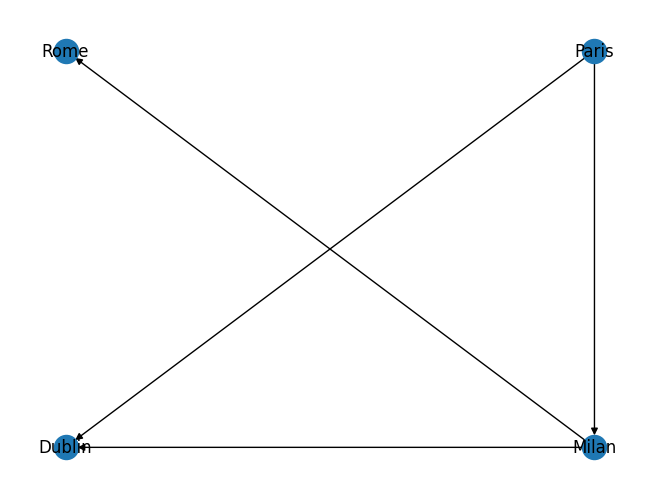

In [6]:
G = nx.DiGraph()
V = {"Dublin", "Paris", "Milan", "Rome"}
E = [("Milan", "Dublin"), ("Paris", "Milan"), ("Paris", "Dublin"), ("Milan", "Rome")]

node_positions = {"Dublin": [0, 0], "Paris": [1, 1], "Rome": [0, 1], "Milan": [1, 0]}

G.add_nodes_from(V)
G.add_edges_from(E)

print(f"V={G.nodes}")
print(f"E={G.edges}")

nx.draw(G, node_positions, with_labels=True)

Because in a **digraph** there is direction, therefore the definition of degree of a node elaborates to **indegree** and **outdegree**

### Indegree

Indegree of a vertex $\mathcal{v}$ is equal to the **number of incoming edges** to it, i.e. $\mathcal{v} \leftarrow$. It is represented as $deg^{-}(\mathcal{v})$.

### Outdegree

Outdegree of a vertex $\mathcal{v}$ is equal to the **number of outgoing edges** from it, i.e. $\mathcal{v} \rightarrow$. It is represented as $deg^{-}(\mathcal{v})$.

In [7]:
print(f"In-degree of each node: { {v: G.in_degree(v) for v in G.nodes} }")
print(f"Out-degree of each node: { {v: G.out_degree(v) for v in G.nodes} }")

In-degree of each node: {'Rome': 1, 'Paris': 0, 'Milan': 1, 'Dublin': 2}
Out-degree of each node: {'Rome': 0, 'Paris': 2, 'Milan': 2, 'Dublin': 0}


## MultiGraph

A multigraph $\mathcal{G} = (V, E)$ is a graph where for every set of nodes $\mathcal{v} \in V$ there are **multiple** edges $\mathcal{e} \in E$.

Now a **multigraph** is a **directed multigraph** if $E$ is a **multi-set** of **ordered couples**; otherwise if $E$ if a **multi-set** of **two-sets**, then it is called an **undirected multigraph**.

In [10]:
multi_DG = nx.MultiDiGraph()
multi_G = nx.MultiGraph()

V = {"Dublin", "Paris", "Milan", "Rome"}
E = [("Milan", "Dublin"), ("Dublin", "Milan"), ("Paris", "Milan"), ("Paris", "Dublin"), ("Milan", "Rome"), ("Rome", "Milan")]

multi_DG.add_nodes_from(V)
multi_DG.add_edges_from(E)

multi_G.add_nodes_from(V)
multi_G.add_edges_from(E)

[0, 1, 0, 0, 0, 1]

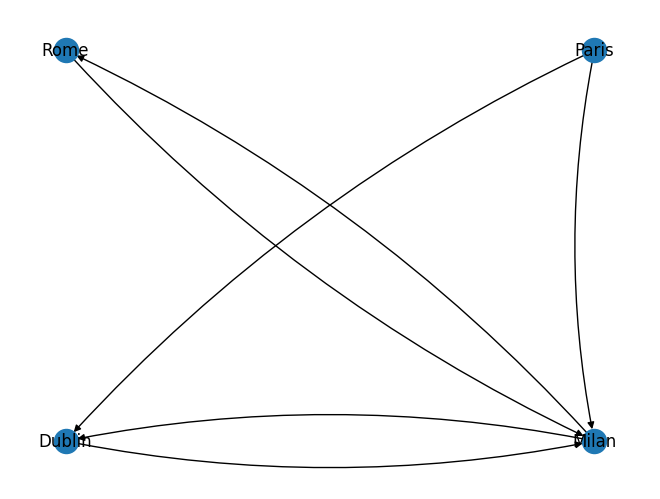

In [13]:
nx.draw(multi_DG, node_positions, with_labels=True, connectionstyle='arc3, rad = 0.1')

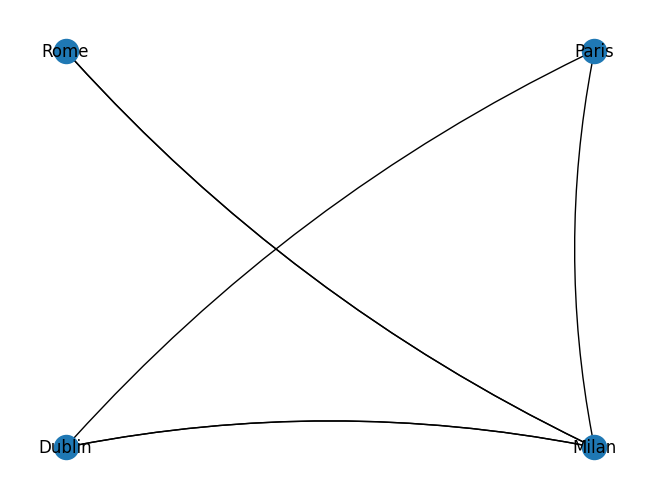

In [14]:
nx.draw(multi_G, node_positions, with_labels=True, connectionstyle='arc3, rad = 0.1')

## Weighted Graph

There are two different kinds of weighted graphs:

### 1. Edge-Weighted Graph

A weighted graph $\mathcal{G}$ defined as $\mathcal{G} = (V, E, w)$ is considered an **edge-weighted graph** if each edge $\mathcal{e} \in E$ has a weight $\mathcal{w} \in \mathbb{R}$ assigned to it.


### 2. Node-Weighted Graph

A weighted graph $\mathcal{G}$ defined as $\mathcal{G} = (V, E, w)$ is considered a **node-weighted graph** if each node $\mathcal{v} \in V$ has a weight $\mathcal{w} \in \mathbb{R}$ assigned to it.


The above things remains the same for directed, undirected, and multigraphs

In [17]:
multi_DG_weighted = nx.MultiDiGraph()
multi_G_weighted = nx.MultiGraph()

V = {"Dublin", "Paris", "Milan", "Rome"}
E = [("Milan", "Dublin", 19), ("Dublin", "Milan", 7), ("Paris", "Milan", 20), ("Paris", "Dublin", 5), ("Milan", "Rome", 2), ("Rome", "Milan", 13)]

multi_DG_weighted.add_nodes_from(V)
multi_DG_weighted.add_weighted_edges_from(E)

multi_G_weighted.add_nodes_from(V)
multi_G_weighted.add_weighted_edges_from(E)

{('Rome', 'Milan', 0): Text(0.23711390503420268, 0.7628860949657972, '13'),
 ('Paris', 'Milan', 0): Text(1.0000000000000002, 0.758032036513905, '20'),
 ('Paris', 'Dublin', 0): Text(0.7628860949657975, 0.7628860949657972, '5'),
 ('Milan', 'Dublin', 0): Text(0.7611516048054912, 0.0, '19'),
 ('Milan', 'Rome', 0): Text(0.7628860949657975, 0.23711390503420254, '2'),
 ('Dublin', 'Milan', 0): Text(0.2388483951945091, 0.0, '7')}

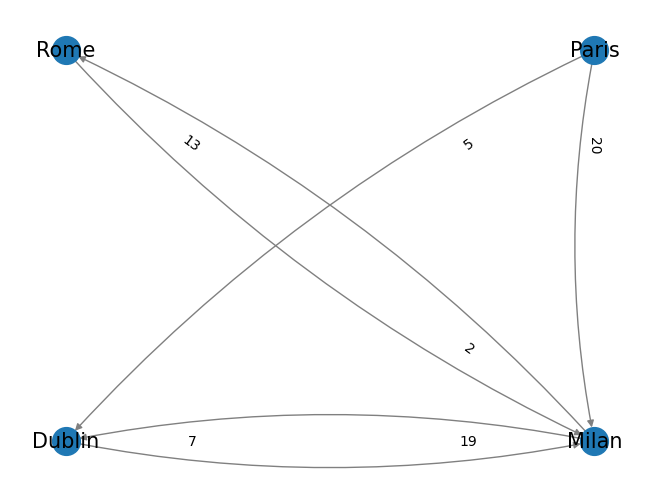

In [40]:
nx.draw(multi_DG_weighted, node_positions, with_labels=True, connectionstyle='arc3, rad = 0.1', node_size=400, font_size=15, edge_color="gray")
nx.draw_networkx_edge_labels(multi_DG_weighted, node_positions, edge_labels=nx.get_edge_attributes(multi_DG_weighted, 'weight'), label_pos=0.23)

## kth-Partite Graph

A Bi-partite, tri-partite or more generally kth-partite graphs are graphs whose vertices can be **partitioned** into two, three or more k-th set of nodes. The **edges** are **allowed across different set of nodes** but **NOT** allowed within **nodes belonging to the same set**.

In [41]:
n_nodes = 10
n_edges = 12
bottom_nodes = [i for i in range(n_nodes) if i % 2 == 0]
top_nodes = [i for i in range(n_nodes) if i % 2 != 0]

iter_edges = zip(np.random.choice(bottom_nodes, n_edges), np.random.choice(top_nodes, n_edges))
edges = pd.DataFrame([{"source": a, "dest": b} for a,b in iter_edges])
edges

,source,dest
0,4,5
1,4,3
2,0,9
3,0,7
4,6,3
5,2,3
6,2,1
7,2,5
8,6,3
9,8,3


In [42]:
B = nx.Graph()

B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)
B.add_edges_from([tuple(x) for x in edges.values])

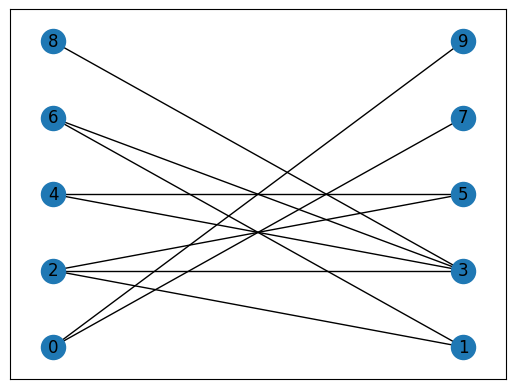

In [43]:
nx.draw_networkx(B, pos=nx.drawing.layout.bipartite_layout(B, bottom_nodes))